In [1]:
# Standard imports
import os
import sys

# Setting up enviornment for neurite
sys.path.append('../../../')
os.environ['NEURITE_BACKEND'] = 'pytorch'

# OPTIONAL: Importing matplotlib for visualization purposes
import matplotlib.pyplot as plt

# Importing samplers from neurite
from neurite.torch.layers import Resample
from neurite.torch.random import RandInt

# Initialize an image

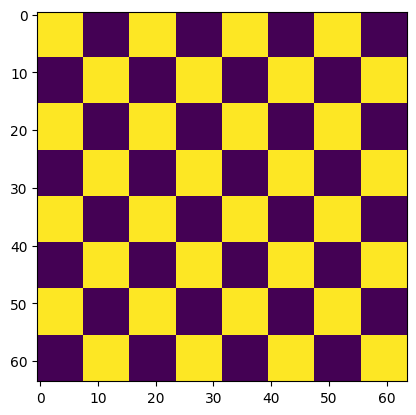

In [61]:
import torch

# Define dimensions
spatial_dims = 64
square_dims = 8

input_tensor = torch.zeros((1, 1, spatial_dims, spatial_dims))

# Fill in 3x3 white squares
for i in range(0, spatial_dims, square_dims):
    for j in range(0, spatial_dims, square_dims):
        # Determine whether to make this square white or black
        if (i // square_dims + j // square_dims) % 2 == 0:
            input_tensor[0, 0, i:i + square_dims, j:j + square_dims] = 1

plt.imshow(input_tensor[0, 0].numpy())

# 1 Resampling a tensor

## 1.1 Perform the resampling operation

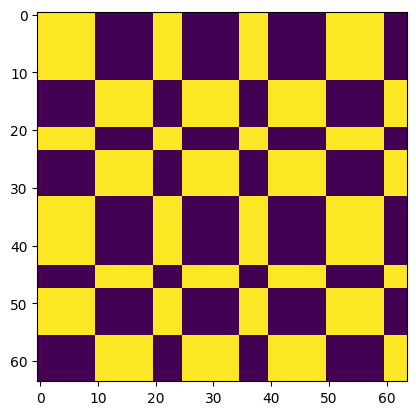

In [ ]:
# Initialize the transformation
transform = Resample(
    # subsample -> upsample (x4)
    operations='susususu',
    stride=RandInt(3, 6)
)

# Transform the image
transformed_tensor = transform(input_tensor)

# Let's see what it looks like
plt.imshow(transformed_tensor[0, 0])

## 1.2 Inspecting the state dict

In [38]:
state_dict = transform.serialize()
state_dict

{'qualname': 'Resample',
 'parent': 'BaseTransform',
 'module': 'neurite.torch.layers',
 'arguments': {'operations': 'su',
  'stride': {'qualname': 'RandInt',
   'parent': 'Sampler',
   'module': 'neurite.torch.random',
   'theta': {'low': 3, 'high': 6}},
  'forbidden_dims': (1, 0),
  'p': 0.5,
  'max_concurrent_subsamplings': None,
  'mode': 'nearest'}}

## 1.3 Accessing certain input parameters

In [43]:
# Let's see what we used for stride!
state_dict['arguments']['stride']

{'qualname': 'RandInt',
 'parent': 'Sampler',
 'module': 'neurite.torch.random',
 'theta': {'low': 3, 'high': 6}}